# Capstone Project - The Battle of Neighborhoods in Gurugram

**INTRODUCTION**

Gurugram, formerly known as Gurgaon, is a city located in the northern Indian state of Haryana. It is situated near the Delhi-Haryana border, about 30 kilometres (19 mi) southwest of the national capital New Delhi and 268 km (167 mi) south of Chandigarh, the state capital. It is one of the major satellite cities of Delhi and is part of the National Capital Region of India As of 2011, Gurgaon had a population of 1,153,000.
Gurugram is India's second largest information technology hub and third largest financial and banking hub. Gurugram is also home to India's largest medical tourism industry. Despite being India's 56th largest city in terms of population, Gurugram is the 8th largest city in the country in terms of total wealth. Gurugram serves as the headquarters of many of India's largest companies, is home to thousands of startup companies and has local offices for more than 250 Fortune 500 companies. It accounts for almost 70% of the total annual economic investments in Haryana state, which has helped it become a leading hub for high-tech industry in northern India. Gurugram is categorised as very high on the Human Development Index, with an HDI of 0.889 (2017).

Gurgaon is full of young people working in IT & Manufaturing sector, thousands professionals visits hundreads of restaurants in gurgaon. Almost all the restaurants are full on weekends as well as on weekdays. Our idea behind this project is to open a North Indian restaurant near any IT sector area where we can attract lots of professionals lunch,dinner as well as for hangout 

**BUSINESS PROBLEM**

As part of northen india, North Indian cuisine is famous among people in Gurgaon like roti,dal makhani,paneer tikka, chicken tandoori, etc. as because it is local cuisine, readily available & pocket friendly majority of people prefer north indian food.  Our main objective of this project is  to finalize a location in **Gurgaon** where we can sucessfully open and run our restaurant. We have to fialize our location in the busiest neighborhood so as to generate good amount revenue as well as excellent star rating to attract more visitors.

**TARGET AUDIENCE**

 - Business professionals who wants to open north indian restaurant in locality
 - People who loves eating north indian food 

**DATASET**

 - For data exploration we use kaggle zomato dataset on kaggel.com, link:https://www.kaggle.com/shrutimehta/zomato-restaurants-data
 - Foursquare database: https://Foursquare.com to be used in order to explore the desired neighborhood data for various restaurant details and access the JSON files. This data shall be utilized to map the North Indian restaurants in various locations.

**METHODOLOGY**

 - Using zomato kaggle dataset we retrive table of restaurant & locality with latitude & longitude.
 - Then we preprocess the dataset and map the neighborhood using folium library.
 - Using Foursquuare API we expolore venues in datasets
 - After exploring venues we use K-Means Clustering alogorithm & map the clusters on map 
 - We examine all clusters and this clustering results will hepl us to finalize a neighborhood where we can start our  business.

**Coding:**

**Importing libraries**

In [1]:
import pandas as pd 
import numpy as np
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium
! pip install geocoder
import geocoder

**Read Zomato Restaurant Datasest from CSV file**

In [2]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Data Preprocessing**

In [3]:
df_india = df[df['Country Code'] == 1]
df_Guru = df_india[df_india['City'] == 'Gurgaon']
df_Guru.reset_index(drop = True, inplace = True)
df_Guru.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


**Data Cleaning**

In [4]:
df_Rev = df_Guru[df_Guru.Longitude !=0.000000][['Restaurant Name','Locality',
'Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Rev = df_Rev[df_Rev['Aggregate rating'] !=0.0]

In [6]:
df_Rev.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


In [7]:
df_Rev.shape

(874, 8)

**Neighborhoods with Maximum Number of North Indian Restaurants in Gurugram**

In [9]:
import matplotlib.pyplot as plt

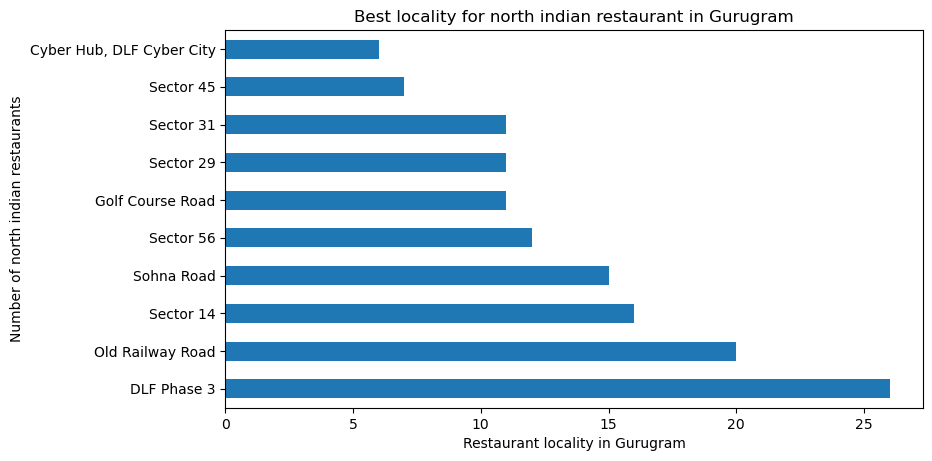

In [10]:
plt.figure(figsize=(9,5),dpi = 100)
df_Rev[df_Rev['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='barh')
plt.title('Best locality for north indian restaurant in Gurugram')
plt.xlabel('Restaurant locality in Gurugram')
plt.ylabel('Number of north indian restaurants')
plt.show()

**Best Neighborhood for North Indian Cuisines in Gurugram**

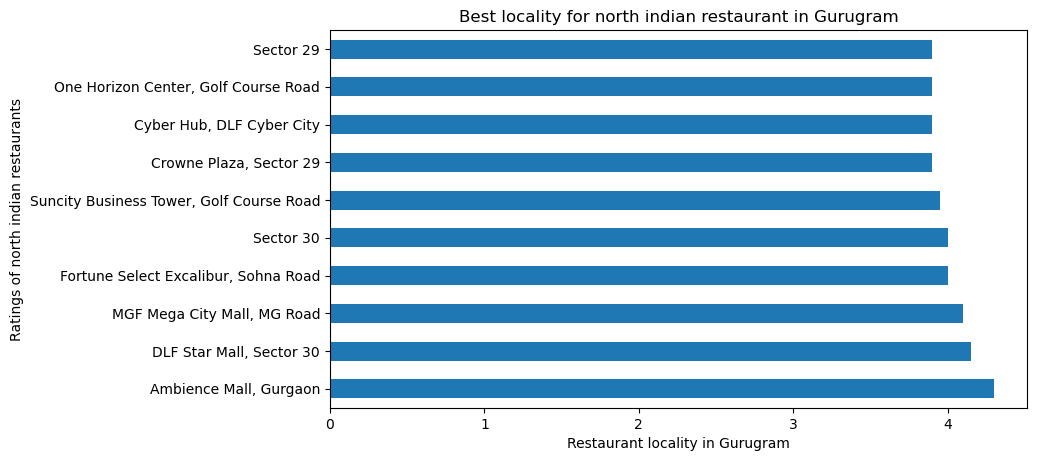

In [11]:
plt.figure(figsize=(9,5),dpi = 100)
df_Rev[df_Rev['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='barh')
plt.title('Best locality for north indian restaurant in Gurugram')
plt.xlabel('Restaurant locality in Gurugram')
plt.ylabel('Ratings of north indian restaurants')
plt.show()

**Worst Rated restaurants Neighborhood for north indian restaurant in Gurugram**

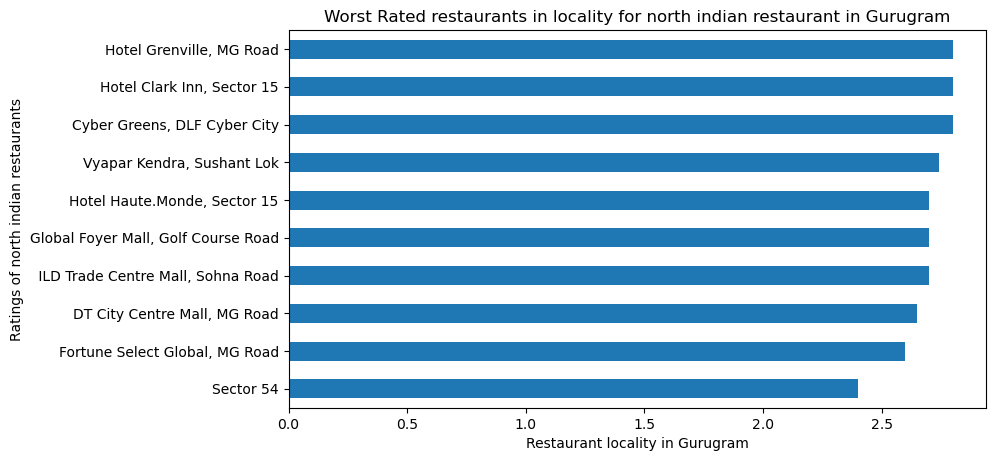

In [12]:
plt.figure(figsize=(9,5),dpi = 100)
df_Rev[df_Rev['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='barh')
plt.title('Worst Rated restaurants in locality for north indian restaurant in Gurugram')
plt.xlabel('Restaurant locality in Gurugram')
plt.ylabel('Ratings of north indian restaurants')
plt.show()

**Mapping data using folium library**

In [13]:
from geopy.geocoders import Nominatim

In [14]:
address = 'Gurgaon'

geolocator = Nominatim(user_agent="guru_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Gurgaon are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Gurgaon are 28.42826235, 77.00270014657752.


In [18]:
from sklearn.cluster import KMeans

In [19]:
guru_rest = folium.Map(location=[latitude,longitude], zoom_start=12)

X = df_Rev['Latitude']
Y = df_Rev['Longitude']
Z = np.stack((X,Y), axis=1)

kmeans = KMeans(n_clusters =3, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red','green','blue','yellow','orange']
df_Rev['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Rev['Latitude'],df_Rev['Longitude'],df_Rev['Locality'],df_Rev['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
    [latitude, longitude],
    radius = 5,
    popup = label,
    color = 'black',
    fill = True,
    fill_color = colors[cluster],
    fill_opacity=0.7).add_to(guru_rest)
    
guru_rest

In [20]:
import matplotlib.pyplot as plt

**Data Transformation** (based on locality)

In [21]:
df_res_loc = df_Rev.groupby('Locality').count()['Restaurant Name'].to_frame()
df_res_rating = df_Rev.groupby('Locality')['Aggregate rating'].mean().to_frame()
df_cuisines = df_Rev.groupby(['Locality'])['Cuisines'].agg(','.join).reset_index()
df_rt = df_Rev.groupby(['Locality'])['Rating text'].agg(','.join).reset_index()
df_votes = df_Rev.groupby(['Locality'])['Votes'].sum().to_frame()
df_lat = df_Rev.groupby('Locality').mean()['Latitude'].to_frame()
df_lng = df_Rev.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(df_lat,df_lng,on='Locality').merge(df_res_loc,on='Locality').merge(df_cuisines,on='Locality').merge(df_res_rating,on='Locality').merge(df_rt,on='Locality').merge(df_votes,on='Locality')

In [22]:

df_final.columns = ['Locality','Lat','Lng','No_of_Restaurant','Cuisines','Agg_rating','Comments','No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cuisines,Agg_rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages,North Indian, Mughlai",3.05,"Average,Average",96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai,South Indian, Seafood, K...",4.15,"Very Good,Very Good",2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery,Ice Cream,Chinese",3.00,"Average,Average,Average",19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese,Pizza, Desserts,Raw Me...",3.00,"Average,Average,Average",65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese,North Indian, Chinese, Continental",2.85,"Average,Average",28


In [23]:
df_final.shape

(110, 8)

In [24]:
df_final.isnull().sum()

Locality            0
Lat                 0
Lng                 0
No_of_Restaurant    0
Cuisines            0
Agg_rating          0
Comments            0
No_of_Votes         0
dtype: int64

**Defining Foursqure API**

In [25]:
CLIENT_ID = '5JX4C0Z32BSZML5EJVAGW4FPI4HCD2NM0OESMHSEDSYKGNMF'
CLIENT_SECRET = 'LZFE5HI5MHAQSAMN0HYQRHDM2KIELR0ANCDHAF5KD5TB0TY5'
VERSION = '20180605'
LIMIT = 100
print('Your Credentials')
print('Client_ID: ' + CLIENT_ID)
print('Client_Secret :' + CLIENT_SECRET)

Your Credentials
Client_ID: 5JX4C0Z32BSZML5EJVAGW4FPI4HCD2NM0OESMHSEDSYKGNMF
Client_Secret :LZFE5HI5MHAQSAMN0HYQRHDM2KIELR0ANCDHAF5KD5TB0TY5


In [26]:
df_final.loc[0, 'Locality']

' ILD Trade Centre Mall, Sohna Road'

In [27]:
locality_latitude = df_final.loc[0, 'Lat'] # neighborhood latitude value
locality_longitude = df_final.loc[0, 'Lng'] # neighborhood longitude value

locality_name = df_final.loc[0, 'Locality'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(locality_name, 
                                                               locality_latitude, 
                                                               locality_longitude))

Latitude and longitude values of  ILD Trade Centre Mall, Sohna Road are 28.424872, 77.03926535.


In [28]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=5JX4C0Z32BSZML5EJVAGW4FPI4HCD2NM0OESMHSEDSYKGNMF&client_secret=LZFE5HI5MHAQSAMN0HYQRHDM2KIELR0ANCDHAF5KD5TB0TY5&v=20180605&ll=28.424872,77.03926535&radius=500&limit=100'.format(
CLIENT_ID,CLIENT_SECRET,VERSION,locality_latitude,locality_longitude,LIMIT)

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60713ede46bf904e502c5c8e'},
 'response': {'headerLocation': 'Gurgaon',
  'headerFullLocation': 'Gurgaon',
  'headerLocationGranularity': 'city',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 28.429372004500006,
    'lng': 77.04437268210673},
   'sw': {'lat': 28.420371995499995, 'lng': 77.03415801789326}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53415d4b498e8a823c4e9292',
       'name': 'Brewer Street',
       'location': {'address': '2001, 2nd Floor, ILD Trade Centre',
        'crossStreet': 'Sohna Road',
        'lat': 28.424499154242366,
        'lng': 77.03913424497446,
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.424499154242366,
          'lng': 77.03913424497446}],
        'distance': 43

In [30]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-31-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Brewer Street,Brewery,28.424499,77.039134
1,Decathlon Gurgaon,Sporting Goods Shop,28.427433,77.036258
2,Sagar Ratna,Indian Restaurant,28.421042,77.038509
3,KFC,Fast Food Restaurant,28.424789,77.038722
4,Grand cinemas,Movie Theater,28.423626,77.039422


In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


**Create function to repeat the same process to all the locality in Gurgaon**

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 10):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Find venues in all localities of Gurgaon**

In [34]:
guru_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

In [35]:
guru_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [36]:
guru_venues.shape

(866, 7)

In [37]:
guru_venues.isnull().sum()

Locality              0
Locality Latitude     0
Locality Longitude    0
Venue                 0
Venue Latitude        0
Venue Longitude       0
Venue Category        0
dtype: int64

In [38]:
guru_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",9,9,9,9,9,9
"Ambience Mall, Gurgaon",10,10,10,10,10,10
"Ansal Plaza Mall, Palam Vihar",5,5,5,5,5,5
Ardee City,4,4,4,4,4,4
"Best Western Skycity Hotel, Sector 15, Gurgaon",4,4,4,4,4,4
...,...,...,...,...,...,...
"Unitech Infospace, Sector 21, Gurgaon",8,8,8,8,8,8
"Vivanta by Taj, Sector 44, Gurgaon",10,10,10,10,10,10
"Vyapar Kendra, Palam Vihar",4,4,4,4,4,4


In [39]:
print('There are {} uniques categories.'.format(len(guru_venues['Venue Category'].unique())))

There are 115 uniques categories.


In [40]:
# one hot encoding
guru_onehot = pd.get_dummies(guru_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
guru_onehot['Locality'] = guru_venues['Locality'] 

# move neighborhood column to the first column
fixed_columns = [guru_onehot.columns[-1]] + list(guru_onehot.columns[:-1])
guru_onehot = guru_onehot[fixed_columns]

guru_onehot.head()

,Locality,American Restaurant,Arcade,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,...,Sports Club,Supermarket,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
guru_onehot.shape

(866, 116)

In [42]:
guru_onehot.isnull().sum()

Locality                         0
American Restaurant              0
Arcade                           0
Asian Restaurant                 0
Auto Workshop                    0
                                ..
Tibetan Restaurant               0
Trail                            0
Train Station                    0
Vegetarian / Vegan Restaurant    0
Whisky Bar                       0
Length: 116, dtype: int64

In [43]:
guru_grouped = guru_onehot.groupby('Locality').mean().reset_index()
guru_grouped

,Locality,American Restaurant,Arcade,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,...,Sports Club,Supermarket,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar
0,"ILD Trade Centre Mall, Sohna Road",0.0,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,"Ambience Mall, Gurgaon",0.2,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.1,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2,"Ansal Plaza Mall, Palam Vihar",0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
3,Ardee City,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.250,0.0,0.0,0.0,0.0,0.0
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,"Unitech Infospace, Sector 21, Gurgaon",0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.125,0.0,0.125,0.0,0.0,0.0,0.0,0.0
106,"Vivanta by Taj, Sector 44, Gurgaon",0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.100,0.0,0.0,0.1,0.0,0.0
107,"Vyapar Kendra, Palam Vihar",0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
108,"Vyapar Kendra, Sushant Lok",0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0


In [44]:
guru_grouped.shape

(110, 116)

In [45]:
guru_grouped.isnull().sum()

Locality                         0
American Restaurant              0
Arcade                           0
Asian Restaurant                 0
Auto Workshop                    0
                                ..
Tibetan Restaurant               0
Trail                            0
Train Station                    0
Vegetarian / Vegan Restaurant    0
Whisky Bar                       0
Length: 116, dtype: int64

In [46]:
num_top_venues = 5

for hood in guru_grouped['Locality']:
    print("----"+hood+"----")
    temp = guru_grouped[guru_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
                  venue  freq
0               Brewery  0.22
1      Department Store  0.11
2   Sporting Goods Shop  0.11
3         Movie Theater  0.11
4  Fast Food Restaurant  0.11


----Ambience Mall, Gurgaon----
                  venue  freq
0   American Restaurant   0.2
1                   Bar   0.1
2            Donut Shop   0.1
3           Coffee Shop   0.1
4  Fast Food Restaurant   0.1


----Ansal Plaza Mall, Palam Vihar----
            venue  freq
0             Gym   0.2
1            Café   0.2
2  Sandwich Place   0.2
3            Food   0.2
4     Pizza Place   0.2


----Ardee City----
                venue  freq
0   Indian Restaurant  0.25
1  Italian Restaurant  0.25
2     Thai Restaurant  0.25
3         Beer Garden  0.25
4       Movie Theater  0.00


----Best Western Skycity Hotel, Sector 15, Gurgaon----
                 venue  freq
0                Hotel  0.75
1     Asian Restaurant  0.25
2  American Restaurant  0.00
3        Movie The

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
locality_venues_sorted = pd.DataFrame(columns=columns)
locality_venues_sorted['Locality'] = guru_grouped['Locality']

for ind in np.arange(guru_grouped.shape[0]):
    locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(guru_grouped.iloc[ind, :], num_top_venues)

locality_venues_sorted.head()

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Brewery,Department Store,Sporting Goods Shop,Fast Food Restaurant,Movie Theater,Shop & Service,BBQ Joint,Indian Restaurant,Dim Sum Restaurant,Diner
1,"Ambience Mall, Gurgaon",American Restaurant,Hotel,Coffee Shop,Donut Shop,Bar,Multiplex,Fast Food Restaurant,Movie Theater,Bowling Alley,Food
2,"Ansal Plaza Mall, Palam Vihar",Pizza Place,Sandwich Place,Café,Food,Gym,Gourmet Shop,Golf Course,Cosmetics Shop,Department Store,Dessert Shop
3,Ardee City,Indian Restaurant,Thai Restaurant,Italian Restaurant,Beer Garden,Whisky Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Asian Restaurant,Food Stand,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store


In [49]:
locality_venues_sorted.isnull().sum()

Locality                  0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [50]:
kclusters = 5

guru_grouped_clustering = guru_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(guru_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 4, 1, 3, 1, 4, 0, 3, 3])

In [51]:
kmeans.labels_.shape

(110,)

In [52]:
locality_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

guru_merged = df_final

guru_merged = guru_merged.join(locality_venues_sorted.set_index('Locality'), on='Locality')

guru_merged.head() 

,Locality,Lat,Lng,No_of_Restaurant,Cuisines,Agg_rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages,North Indian, Mughlai",3.05,"Average,Average",96,1,Brewery,Department Store,Sporting Goods Shop,Fast Food Restaurant,Movie Theater,Shop & Service,BBQ Joint,Indian Restaurant,Dim Sum Restaurant,Diner
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai,South Indian, Seafood, K...",4.15,"Very Good,Very Good",2689,2,American Restaurant,Hotel,Coffee Shop,Donut Shop,Bar,Multiplex,Fast Food Restaurant,Movie Theater,Bowling Alley,Food
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery,Ice Cream,Chinese",3.00,"Average,Average,Average",19,4,Pizza Place,Sandwich Place,Café,Food,Gym,Gourmet Shop,Golf Course,Cosmetics Shop,Department Store,Dessert Shop
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese,Pizza, Desserts,Raw Me...",3.00,"Average,Average,Average",65,1,Indian Restaurant,Thai Restaurant,Italian Restaurant,Beer Garden,Whisky Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese,North Indian, Chinese, Continental",2.85,"Average,Average",28,3,Hotel,Asian Restaurant,Food Stand,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store


In [53]:
guru_merged.shape

(110, 19)

In [54]:
guru_merged.isnull().sum()

Locality                  0
Lat                       0
Lng                       0
No_of_Restaurant          0
Cuisines                  0
Agg_rating                0
Comments                  0
No_of_Votes               0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

**Mapping Clusters**

In [55]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors = ['red','green','blue','yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(guru_merged['Lat'], guru_merged['Lng'], guru_merged['Locality'], guru_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine Clusters**

**Cluster 1**

In [56]:
guru_merged.loc[guru_merged['Cluster Labels'] == 0, guru_merged.columns[[1] + list(range(5, guru_merged.shape[1]))]]

,Lat,Agg_rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,28.509225,3.500000,Good,32,0,Hotel,Clothing Store,Campground,Fast Food Restaurant,Food Court,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop
11,28.460925,3.200000,Average,6,0,Hotel,Hotel Bar,Sandwich Place,Gym,Indian Restaurant,Restaurant,Chinese Restaurant,Café,Diner,Electronics Store
25,28.461636,4.150000,"Very Good,Very Good",306,0,Hotel,Tea Room,Indian Restaurant,Multiplex,Chinese Restaurant,Restaurant,Brewery,Coffee Shop,Bakery,Bank
28,28.422147,3.500000,"Average,Good",110,0,Gym / Fitness Center,Hotel,Gift Shop,Cable Car,Moroccan Restaurant,Hotel Bar,Asian Restaurant,Gourmet Shop,Flea Market,Dessert Shop
30,28.481847,2.600000,Average,20,0,Coffee Shop,Hotel,Chinese Restaurant,Nightclub,Restaurant,French Restaurant,Buffet,Flea Market,Dessert Shop,Dhaba
36,28.455392,2.800000,"Average,Average",19,0,Hotel,Restaurant,Business Service,Department Store,Asian Restaurant,Gym / Fitness Center,Gym,Dessert Shop,Dhaba,Dim Sum Restaurant
37,28.459336,3.557143,"Average,Average,Good,Good,Good,Good,Very Good",1688,0,Hotel,Donut Shop,Coffee Shop,Snack Place,Restaurant,Fast Food Restaurant,Thai Restaurant,Pizza Place,Gym,Department Store
38,28.500898,3.800000,Good,73,0,Indian Restaurant,Hotel,Bed & Breakfast,Pizza Place,Restaurant,Burger Joint,Shopping Mall,Convenience Store,General Entertainment,Gym
44,28.481033,3.700000,"Average,Good,Very Good",279,0,Hotel,Gym / Fitness Center,Trail,Gym,Buffet,Restaurant,Nightclub,Whisky Bar,Donut Shop,Falafel Restaurant
58,28.459247,3.500000,"Average,Average,Good,Good",562,0,Hotel,Pizza Place,Sandwich Place,Chinese Restaurant,Diner,Donut Shop,Coffee Shop,Gym,Indian Restaurant,Gift Shop


**Cluster 2**

In [57]:
guru_merged.loc[guru_merged['Cluster Labels'] == 1, guru_merged.columns[[1] + list(range(5, guru_merged.shape[1]))]]

,Lat,Agg_rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.424872,3.050000,"Average,Average",96,1,Brewery,Department Store,Sporting Goods Shop,Fast Food Restaurant,Movie Theater,Shop & Service,BBQ Joint,Indian Restaurant,Dim Sum Restaurant,Diner
3,28.441660,3.000000,"Average,Average,Average",65,1,Indian Restaurant,Thai Restaurant,Italian Restaurant,Beer Garden,Whisky Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
5,28.480759,3.900000,Good,415,1,Indian Restaurant,American Restaurant,Bakery,Donut Shop,Scenic Lookout,Brewery,Bar,Department Store,Gym,Food
13,28.468424,3.800000,"Good,Good",312,1,Indian Restaurant,Brewery,Brazilian Restaurant,Park,Bar,Nightclub,Hotel,Diner,Donut Shop,Dim Sum Restaurant
20,28.482766,3.800000,Good,299,1,Indian Restaurant,American Restaurant,Bakery,Brewery,Mexican Restaurant,Department Store,Scenic Lookout,Bar,Gym,Donut Shop
31,28.460392,3.642857,"Average,Average,Excellent,Good,Good,Good,Very ...",2637,1,Shopping Mall,Indian Restaurant,Korean Restaurant,Brewery,Japanese Restaurant,Pub,Golf Course,Gym,Dhaba,Dim Sum Restaurant
40,28.419985,3.400000,Average,41,1,Indian Restaurant,Brewery,Coffee Shop,Sandwich Place,Shopping Mall,Fast Food Restaurant,Café,Supermarket,Movie Theater,Electronics Store
41,28.479760,3.200000,"Average,Good",161,1,Indian Restaurant,American Restaurant,Bakery,Department Store,Café,Scenic Lookout,Bar,Gym,Brewery,Diner
43,28.468217,3.700000,"Good,Good",543,1,Café,Indian Restaurant,Park,Thai Restaurant,General Entertainment,Brewery,Bar,Nightclub,Donut Shop,Fast Food Restaurant
46,28.467629,3.200000,Average,137,1,Indian Restaurant,Brewery,Café,Park,Thai Restaurant,General Entertainment,Bar,Nightclub,Donut Shop,Fast Food Restaurant


**Cluster 3**

In [58]:
guru_merged.loc[guru_merged['Cluster Labels'] == 2, guru_merged.columns[[1] + list(range(5, guru_merged.shape[1]))]]

,Lat,Agg_rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.502845,4.150000,"Very Good,Very Good",2689,2,American Restaurant,Hotel,Coffee Shop,Donut Shop,Bar,Multiplex,Fast Food Restaurant,Movie Theater,Bowling Alley,Food
14,28.493723,2.800000,Average,191,2,American Restaurant,Bar,Italian Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Plaza,Café,Burmese Restaurant,Bistro,Coffee Shop
15,28.495004,3.860976,"Average,Excellent,Excellent,Excellent,Good,Goo...",36185,2,American Restaurant,Bar,Italian Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Plaza,Café,Burmese Restaurant,Bistro,Coffee Shop
16,28.492075,3.460000,"Average,Good,Good,Poor,Very Good",1241,2,American Restaurant,Bar,Gastropub,Middle Eastern Restaurant,Falafel Restaurant,Plaza,Café,Burmese Restaurant,Bistro,Coffee Shop
18,28.475867,3.007143,"Average,Average,Average,Average,Average,Averag...",1033,2,Fast Food Restaurant,Pizza Place,Brewery,Electronics Store,Multiplex,Department Store,Coffee Shop,Restaurant,Health & Beauty Service,Bar
19,28.472881,3.352174,"Average,Average,Average,Average,Average,Averag...",2651,2,Fast Food Restaurant,Coffee Shop,Pizza Place,Clothing Store,Indian Restaurant,Multiplex,Restaurant,Electronics Store,Metro Station,Flea Market
21,28.491283,3.198529,"Average,Average,Average,Average,Average,Averag...",3918,2,Coffee Shop,Convenience Store,Pub,Soccer Field,Light Rail Station,Tea Room,Fast Food Restaurant,Pizza Place,Dessert Shop,Dhaba
23,28.448633,3.675000,"Average,Good,Good,Good",214,2,Whisky Bar,Shopping Mall,Gourmet Shop,Lounge,Coffee Shop,Chinese Restaurant,Café,Brewery,Pizza Place,Bakery
24,28.447905,3.706667,"Average,Average,Average,Good,Good,Good,Good,Go...",2920,2,Whisky Bar,Shopping Mall,Gourmet Shop,Falafel Restaurant,Nightclub,Chinese Restaurant,Café,Brewery,Pizza Place,Bakery
26,28.478961,3.042857,"Average,Average,Average,Average,Average,Averag...",1215,2,Pizza Place,Bar,Department Store,Pub,Donut Shop,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Coffee Shop,Indian Restaurant


**Cluster 4**

In [59]:
guru_merged.loc[guru_merged['Cluster Labels'] == 3, guru_merged.columns[[1] + list(range(5, guru_merged.shape[1]))]]

,Lat,Agg_rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.85,"Average,Average",28,3,Hotel,Asian Restaurant,Food Stand,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
8,28.461988,3.80,Good,91,3,Hotel,Japanese Restaurant,Café,Resort,Food,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner
9,28.468385,3.25,"Average,Good",44,3,Hotel,Indian Restaurant,Bed & Breakfast,Food Stand,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
10,28.334942,3.40,Average,19,3,Hotel,Convenience Store,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Falafel Restaurant
34,28.457610,2.80,Average,7,3,Hotel,Asian Restaurant,Food Stand,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
35,28.465600,2.80,Average,15,3,Hotel,Bed & Breakfast,Food Stand,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
45,28.470510,3.00,"Average,Average,Average",35,3,Hotel,Indian Restaurant,Food Stand,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
57,28.459079,3.20,Average,13,3,Hotel,Market,Food Stand,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
62,28.449740,3.50,Good,194,3,Hotel,Gym,Snack Place,Gym / Fitness Center,Health & Beauty Service,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner
65,28.463685,3.00,"Average,Average",12,3,Hotel,Bus Station,Market,Food Stand,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store


**Cluster 5**

In [60]:
guru_merged.loc[guru_merged['Cluster Labels'] == 4, guru_merged.columns[[1] + list(range(5, guru_merged.shape[1]))]]

,Lat,Agg_rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.511460,3.000000,"Average,Average,Average",19,4,Pizza Place,Sandwich Place,Café,Food,Gym,Gourmet Shop,Golf Course,Cosmetics Shop,Department Store,Dessert Shop
6,28.443040,3.500000,"Average,Average,Average,Average,Average,Averag...",1214,4,Chinese Restaurant,Falafel Restaurant,Tea Room,Café,Sandwich Place,Shopping Mall,Ice Cream Shop,Gift Shop,Fast Food Restaurant,Department Store
12,28.468311,3.912500,"Good,Good,Good,Good,Very Good,Very Good,Very G...",1841,4,Café,Italian Restaurant,Pizza Place,Asian Restaurant,Market,Bagel Shop,Lounge,Electronics Store,Flea Market,Fast Food Restaurant
17,28.467327,3.582353,"Average,Average,Average,Good,Good,Good,Good,Go...",3208,4,Café,Italian Restaurant,Pizza Place,Asian Restaurant,Market,Bagel Shop,Lounge,Electronics Store,Flea Market,Fast Food Restaurant
22,28.466065,3.804762,"Average,Average,Average,Good,Good,Good,Good,Go...",3414,4,Café,Italian Restaurant,Indian Restaurant,Tea Room,Bagel Shop,Market,Asian Restaurant,Dim Sum Restaurant,Diner,Food Stand
29,28.416495,3.800000,"Good,Very Good",153,4,Café,Supermarket,Sandwich Place,Fast Food Restaurant,Bed & Breakfast,Hotel,Indian Restaurant,Ice Cream Shop,Clothing Store,Dim Sum Restaurant
32,28.443011,3.559259,"Average,Average,Average,Average,Average,Averag...",3443,4,Chinese Restaurant,Falafel Restaurant,Pizza Place,Ice Cream Shop,Café,Nightclub,Sandwich Place,Flea Market,Department Store,Dessert Shop
33,28.421012,3.000000,"Average,Average,Average",333,4,Shopping Mall,Convenience Store,Pizza Place,Department Store,Dessert Shop,Café,Sandwich Place,Flea Market,Cosmetics Shop,Dhaba
51,28.416693,3.350000,"Average,Average",199,4,Café,Supermarket,Sandwich Place,Fast Food Restaurant,Bed & Breakfast,Hotel,Indian Restaurant,Ice Cream Shop,Clothing Store,Dim Sum Restaurant
53,28.410956,2.200000,Poor,93,4,Fast Food Restaurant,Pizza Place,Brewery,Clothing Store,Café,Convenience Store,Vegetarian / Vegan Restaurant,Ice Cream Shop,Indian Restaurant,Gourmet Shop


**Discussion**

 - Cluster 1 is good for hotels, bars, fastfood & indian restaurants,Cluster 2 has good amount of indian & asian restaurants,with good user ratings,Cluster 3 is good for having indian food & brewery,Cluster 4 famous for chinese, italian restaurants & coffee shops.

 - DLF Phase3, Ambience Mall & golf course road are the neighborhoods contain  maximum number of North Indian restaurants.
 
 - Ambience Mall, DLF star Mall sec30 & MG Road are the neighborhoods contain  best North Indian restaurants with good user ratings.


**Conclusion**

 - DLF Cyber city and Sector 29 would be ideal neighborhood to start north indian restaurant as it conatain fair amount of north indian restaurants with average user rating which results into less competition as compared to other neighborhoods. 
 
 - So, a Restaurant with nice menue & ambience would be perfect in this neighborhood to attract crowd as well as for runing successful buisness.